#### Titanic data base


In [12]:
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
plt.style.available
#import plotly.graph_objs as go
import scipy.stats as stats
#import plotly.plotly as py
import seaborn as sns
#sns.set(color_codes=True)
sns.set(style='white', context='notebook', palette='deep')
sns.set_style('white')
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
%precision 2

import warnings 
warnings.filterwarnings('ignore')
import sklearn
import scipy
import json
import sys
import csv
import os

#pylab.rcParams['figure.figsize'] = 12,8

#mpl.style.use('ggplot')

%matplotlib inline

In [14]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [50]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


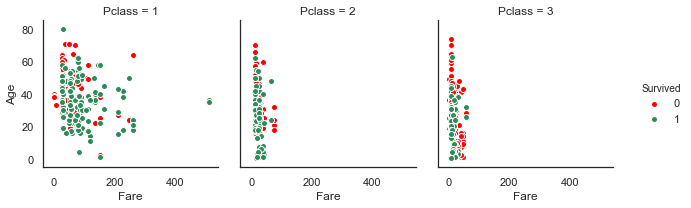

In [56]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"red"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

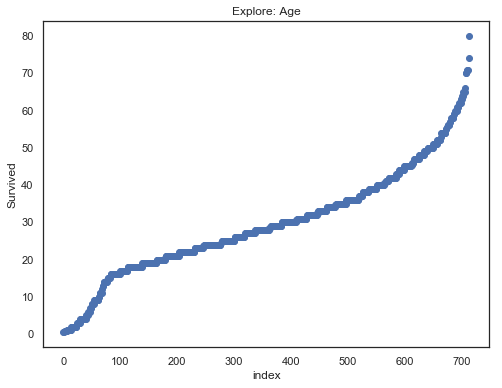

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train['Age'].values))
plt.xlabel('index')
plt.ylabel('Survived')
plt.title('Explore: Age')
plt.show()

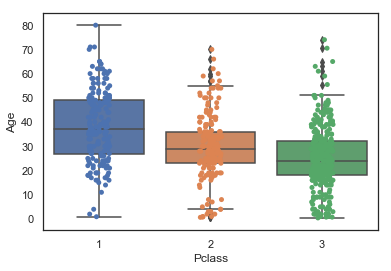

In [58]:
#box plot
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
ax= sns.stripplot(x="Pclass", y="Age", data=df_train, jitter=True, edgecolor="gray")
plt.show()

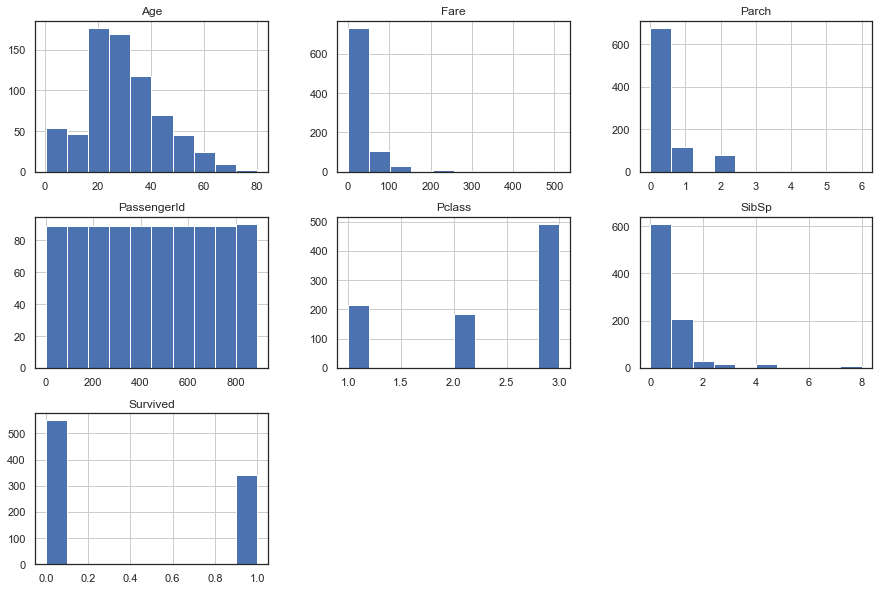

<Figure size 432x288 with 0 Axes>

In [19]:
# histograms
df_train.hist(figsize=(15,10));
plt.figure();

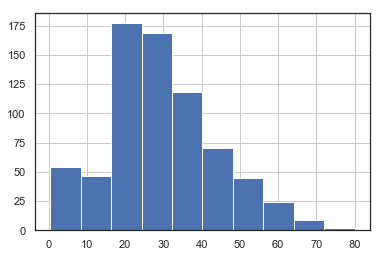

In [20]:
df_train["Age"].hist();

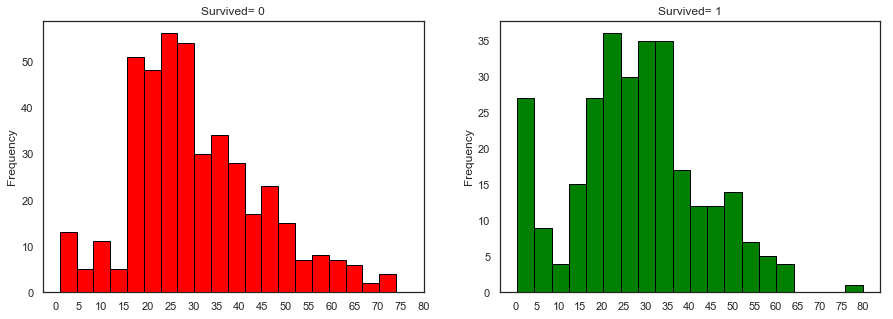

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

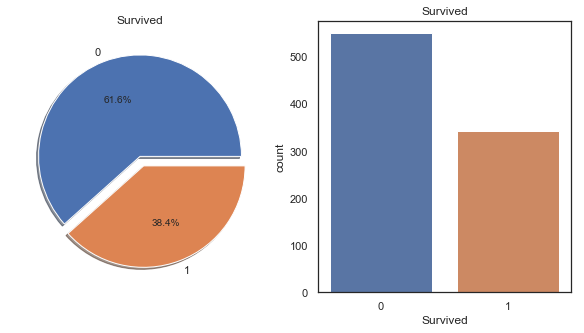

In [26]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

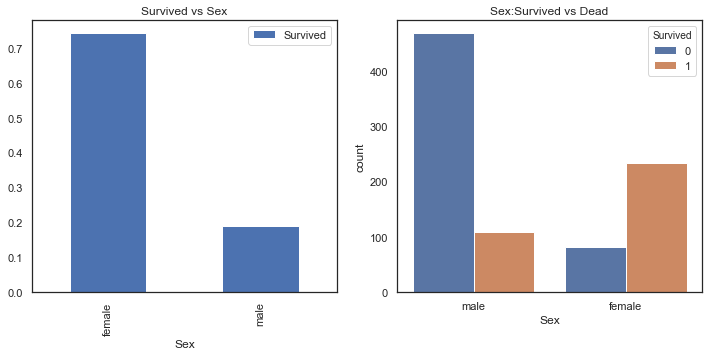

In [29]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

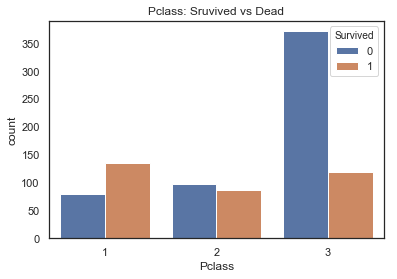

In [30]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

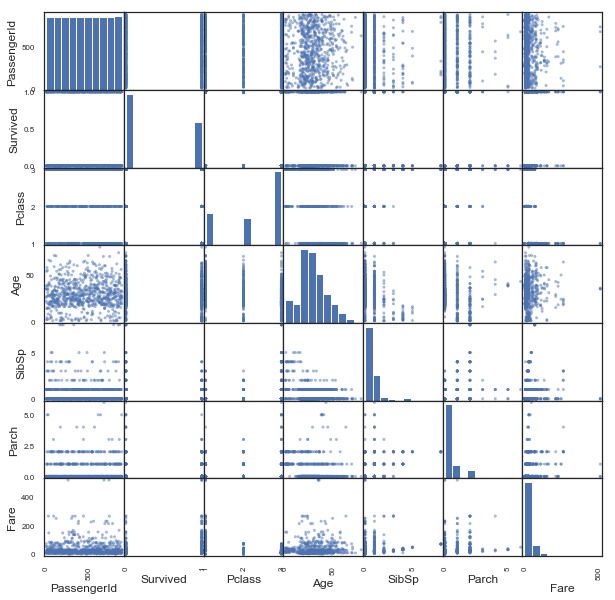

<Figure size 432x288 with 0 Axes>

In [31]:
# scatter plot matrix
pd.plotting.scatter_matrix(df_train,figsize=(10,10))
plt.figure();

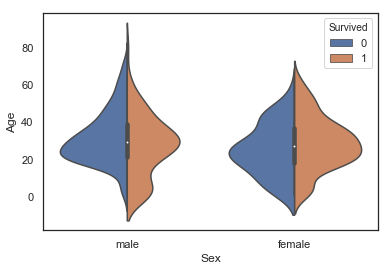

In [61]:
# violinplots on petal-length for each species
sns.violinplot(data=df_train,x="Sex", y="Age", hue="Survived", split = True)

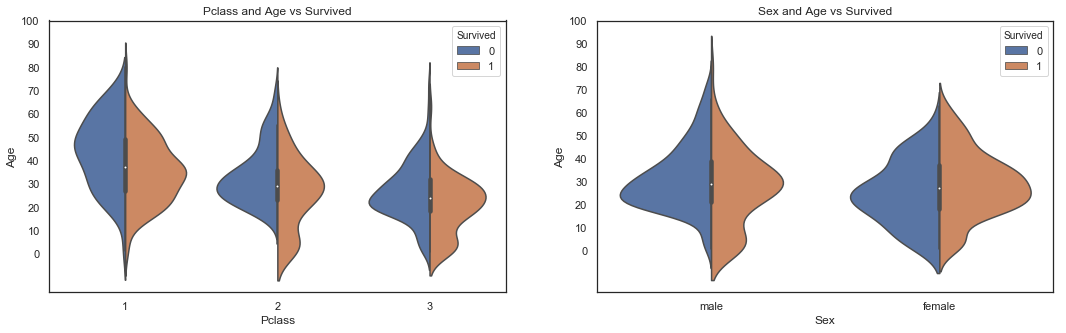

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,5))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

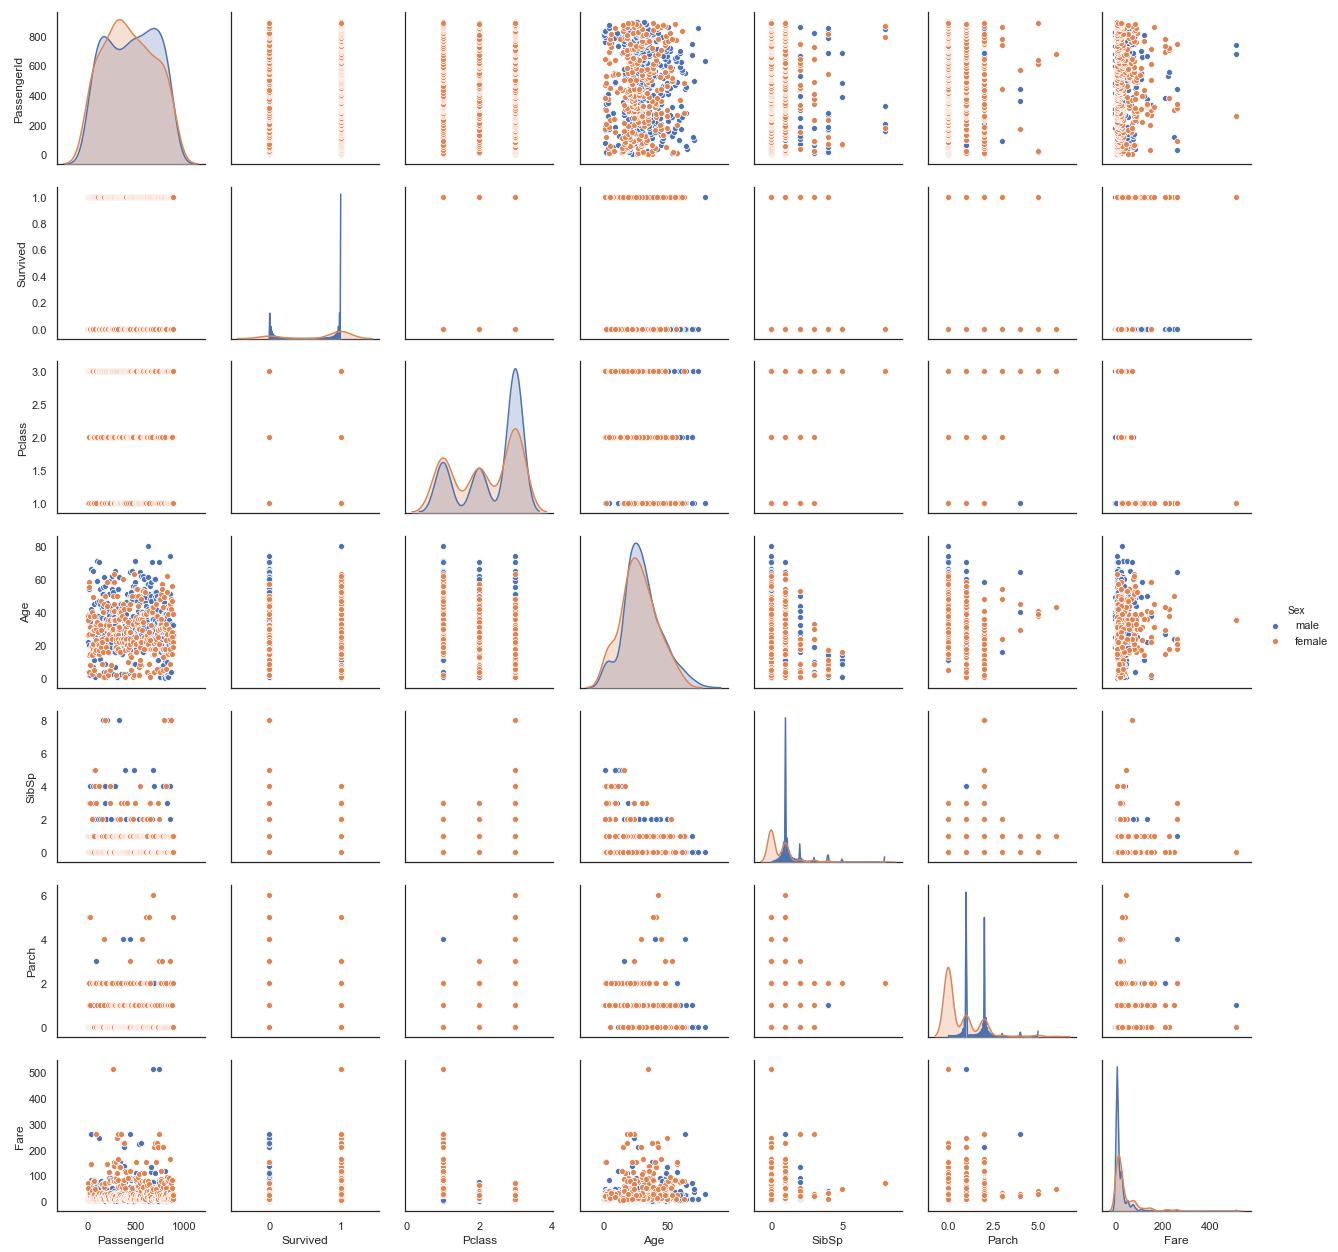

In [35]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(df_train, hue="Sex");

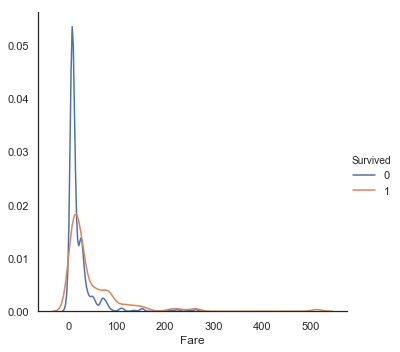

In [36]:
sns.FacetGrid(df_train, hue="Survived", size=5).map(sns.kdeplot, "Fare").add_legend()
plt.show();

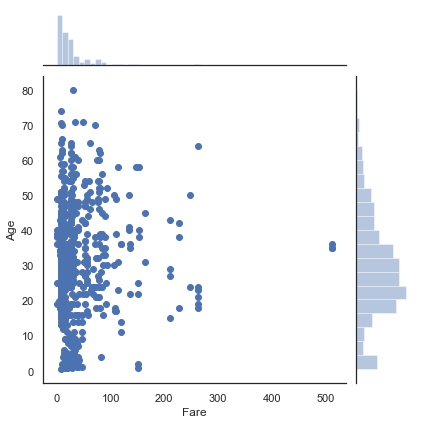

In [37]:
sns.jointplot(x='Fare',y='Age',data=df_train);

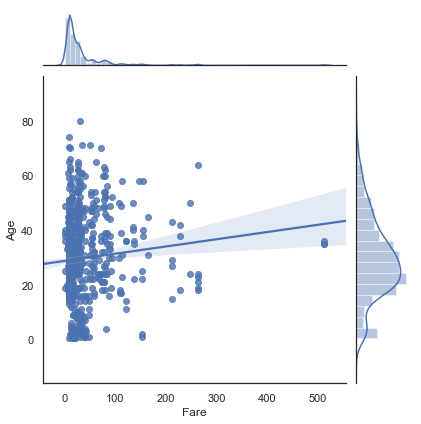

In [38]:
sns.jointplot(x='Fare',y='Age' ,data=df_train, kind='reg');

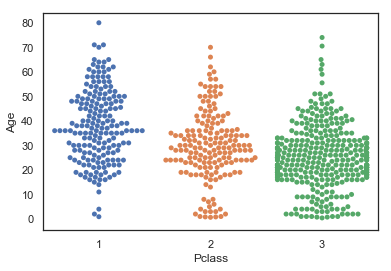

In [39]:
sns.swarmplot(x='Pclass',y='Age',data=df_train);

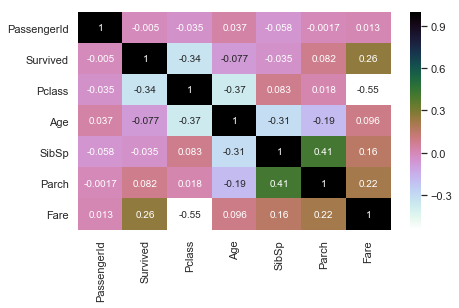

In [40]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df_train.corr(),annot=True,cmap='cubehelix_r') 
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show();

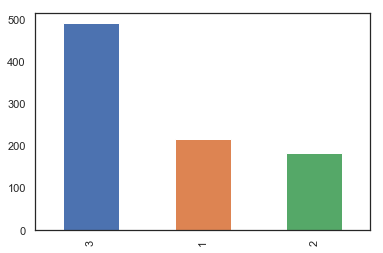

In [41]:
df_train['Pclass'].value_counts().plot(kind="bar");

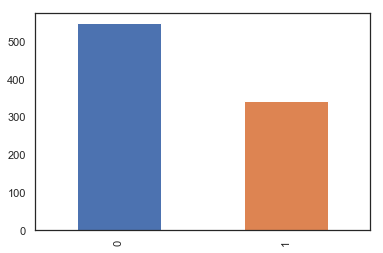

In [63]:
df_train['Survived'].value_counts().plot(kind="bar");

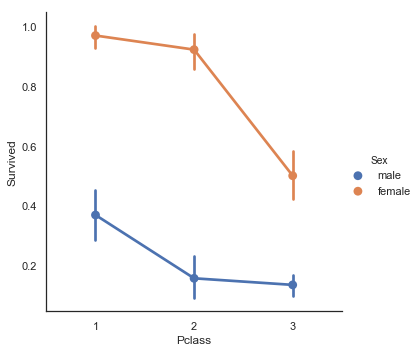

In [42]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show();

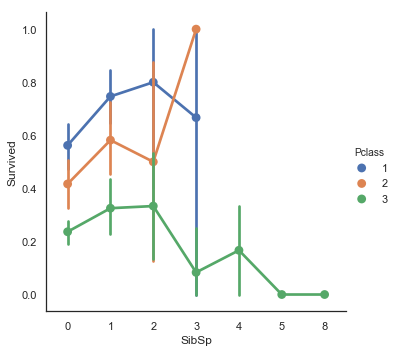

In [43]:
sns.factorplot('SibSp','Survived',hue='Pclass',data=df_train)
plt.show()

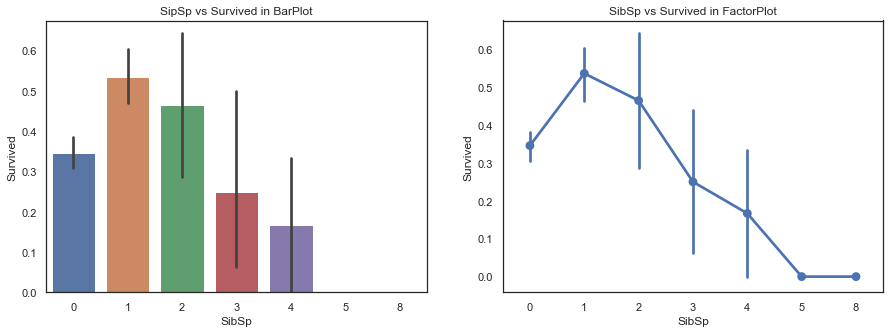

In [45]:
#let's see some others factorplot
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot('SibSp','Survived', data=df_train,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=df_train,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show();

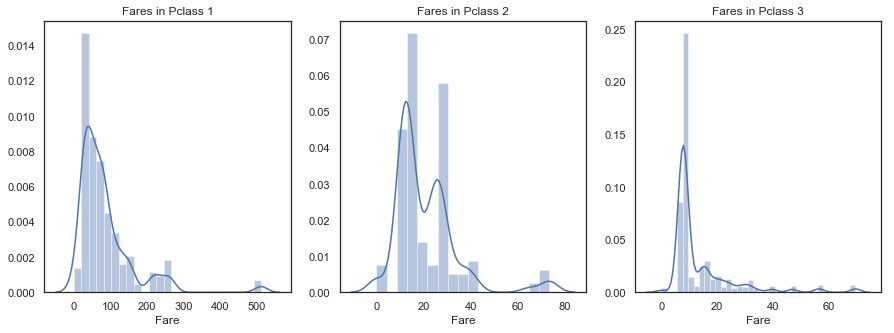

In [47]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df_train[df_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

check missing data

In [80]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()  # total number of NaN
        count = df.isnull().count()
        percent = (df.isnull().sum())/(df.isnull().count())*100  # percentage of NaN
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        #data_type = []
        
        #for col in df.columns:
        #    dtype = str(df[col].dtype)
        #    data_type.append(dtype)
        #output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [81]:
check_missing_data(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0.0,0.0,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,0.0,687.000000,2.000000
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


In [74]:
check_missing_data(df_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0.0,0.0,0.0,0.0,86.000000,0.0,0.0,0.0,1.000000,327.000000,0.0
Percent,0.0,0.0,0.0,0.0,0.002057,0.0,0.0,0.0,0.000024,0.007823,0.0
